# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

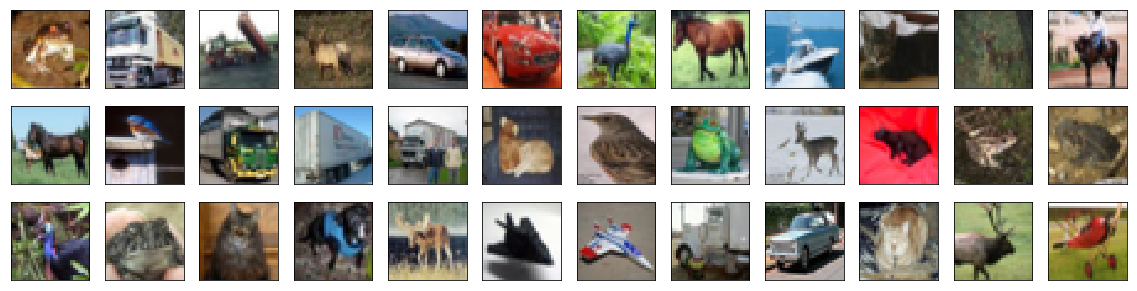

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# parameter added: kernel size = 4
#KERNEL_SIZE = 2
KERNEL_SIZE = 4

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=KERNEL_SIZE, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.56854, saving model to model.weights.best.hdf5
15s - loss: 1.5674 - acc: 0.4318 - val_loss: 1.5685 - val_acc: 0.4550
Epoch 2/100
Epoch 00001: val_loss improved from 1.56854 to 1.23086, saving model to model.weights.best.hdf5
14s - loss: 1.2217 - acc: 0.5693 - val_loss: 1.2309 - val_acc: 0.5748
Epoch 3/100
Epoch 00002: val_loss did not improve
14s - loss: 1.1119 - acc: 0.6133 - val_loss: 1.2696 - val_acc: 0.5866
Epoch 4/100
Epoch 00003: val_loss improved from 1.23086 to 1.22188, saving model to model.weights.best.hdf5
14s - loss: 1.0564 - acc: 0.6371 - val_loss: 1.2219 - val_acc: 0.5846
Epoch 5/100
Epoch 00004: val_loss improved from 1.22188 to 0.97759, saving model to model.weights.best.hdf5
14s - loss: 1.0304 - acc: 0.6470 - val_loss: 0.9776 - val_acc: 0.6634
Epoch 6/100
Epoch 00005: val_loss did not improve
14s - loss: 1.0249 - acc: 0.6568 - val_loss: 1.2392 - val_acc: 0.5966
Epo

Epoch 00066: val_loss did not improve
14s - loss: 1.7343 - acc: 0.4112 - val_loss: 1.6220 - val_acc: 0.4376
Epoch 68/100
Epoch 00067: val_loss did not improve
13s - loss: 1.7460 - acc: 0.4058 - val_loss: 1.4870 - val_acc: 0.4736
Epoch 69/100
Epoch 00068: val_loss did not improve
13s - loss: 1.7671 - acc: 0.3977 - val_loss: 1.4538 - val_acc: 0.4996
Epoch 70/100
Epoch 00069: val_loss did not improve
13s - loss: 1.7643 - acc: 0.4037 - val_loss: 1.6501 - val_acc: 0.4278
Epoch 71/100
Epoch 00070: val_loss did not improve
13s - loss: 1.7801 - acc: 0.3967 - val_loss: 1.5348 - val_acc: 0.4742
Epoch 72/100
Epoch 00071: val_loss did not improve
13s - loss: 1.7811 - acc: 0.3982 - val_loss: 2.1573 - val_acc: 0.3404
Epoch 73/100
Epoch 00072: val_loss did not improve
13s - loss: 1.7856 - acc: 0.3955 - val_loss: 1.8871 - val_acc: 0.4286
Epoch 74/100
Epoch 00073: val_loss did not improve
13s - loss: 1.7779 - acc: 0.3873 - val_loss: 1.7340 - val_acc: 0.4586
Epoch 75/100
Epoch 00074: val_loss did not im

### 8. Load the Model with the Best Validation Accuracy

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6573


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

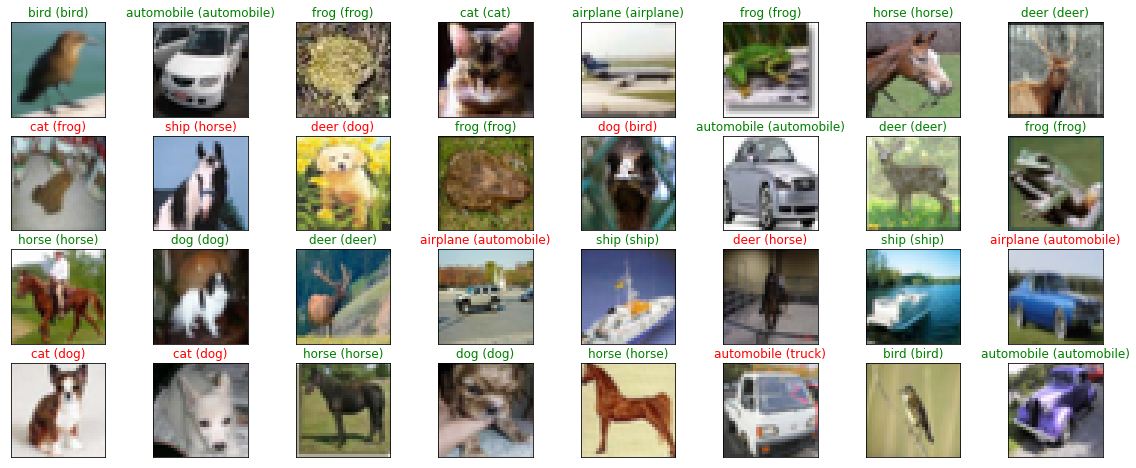

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))